In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtest.shape

(10000, 28, 28)

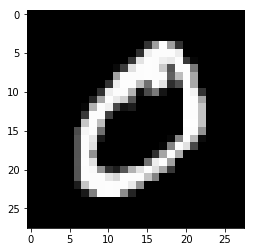

In [5]:
plt.imshow(xtrain[1,:,:],cmap='gray')

In [0]:
ytrain[1]

0

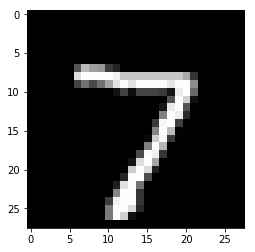

In [6]:
plt.imshow(xtest[0,:,:],cmap='gray')

In [0]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [7]:
L=pd.DataFrame(ytrain)    # transforming the training output to a dataframe
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [9]:
#Represent Training & Testing samples suitable for tensorflow backend
x_train=xtrain.reshape(xtrain.shape[0],28,28,1).astype('float32')    # The digit 1 signifies the images are in grayscale
x_test=xtest.reshape(xtest.shape[0],28,28,1).astype('float32')


In [10]:
x_test.shape

(10000, 28, 28, 1)

In [12]:
x_train/=255
x_test/=255    # standardize the data for train and test to be between 0 -1

In [13]:
#Encoding the output class label (One-Hot Encoding)
y_train=np_utils.to_categorical(ytrain,10)
y_test=np_utils.to_categorical(ytest,10)
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
model=Sequential()
model.add(Conv2D(32,(3,3),border_mode='valid',input_shape=(28,28,1),activation='relu'))  # 2d conv with 3X3 filter
                                        # border mode for filter to create smaller size activation map


C:\Users\Mukesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
  


In [22]:
model.add(MaxPooling2D(pool_size=(2,2)))     # pooling filter 2 X 2

In [23]:
model.add(Flatten())   # convert the output of pooling layer to a single vector for dnese layer

In [24]:
model.add(Dense(128,activation='relu'))

In [25]:
model.add(Dense(10,activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.fit(x_train,y_train,batch_size=200,nb_epoch=12,verbose=1,validation_data=(x_test,y_test))

C:\Users\Mukesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 28s 470us/step - loss: 1.8393 - acc: 0.4584 - val_loss: 0.9990 - val_acc: 0.7862
Epoch 2/12
60000/60000 [==============================] - 29s 483us/step - loss: 0.7020 - acc: 0.8194 - val_loss: 0.5172 - val_acc: 0.8643
Epoch 3/12
60000/60000 [==============================] - 29s 483us/step - loss: 0.4682 - acc: 0.8684 - val_loss: 0.4042 - val_acc: 0.8859
Epoch 4/12
60000/60000 [==============================] - 29s 482us/step - loss: 0.3954 - acc: 0.8850 - val_loss: 0.3627 - val_acc: 0.8930
Epoch 5/12
60000/60000 [==============================] - 29s 476us/step - loss: 0.3571 - acc: 0.8956 - val_loss: 0.3311 - val_acc: 0.9000
Epoch 6/12
60000/60000 [==============================] - 27s 455us/step - loss: 0.3305 - acc: 0.9027 - val_loss: 0.3069 - val_acc: 0.9100
Epoch 7/12
60000/60000 [==============================] - 27s 454us/step - loss: 0.3101 - acc: 0.9080 - val_loss: 0.

In [28]:
score=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 9s 873us/step


In [29]:
score

[0.22678403624594212, 0.9337]

In [30]:
y_predict = model.predict(x_test)

In [31]:
y_predict[0]

array([9.6745198e-06, 4.9266013e-09, 2.6113832e-05, 6.2878244e-04,
       3.0704800e-07, 7.7578461e-06, 6.1932834e-11, 9.9832088e-01,
       8.0196323e-06, 9.9848839e-04], dtype=float32)

In [32]:
np.argmax(y_predict[0])

7

In [33]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 960    0    2    3    0    4    6    3    2    0]
 [   0 1106    3    2    1    1    4    2   16    0]
 [   9    2  943   17   11    1    7   12   28    2]
 [   3    0   13  929    0   16    1   14   28    6]
 [   1    2    5    1  931    2    8    2    4   26]
 [   8    2    2   27    8  793   12    3   31    6]
 [  10    3    4    0   12   15  909    1    4    0]
 [   2    7   21    9    7    1    0  954    1   26]
 [   5    3    4   15    9   17    9   10  899    3]
 [   8    7    1   11   41    5    1   12   10  913]]


In [34]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.97      0.98      1135
           2       0.94      0.91      0.93      1032
           3       0.92      0.92      0.92      1010
           4       0.91      0.95      0.93       982
           5       0.93      0.89      0.91       892
           6       0.95      0.95      0.95       958
           7       0.94      0.93      0.93      1028
           8       0.88      0.92      0.90       974
           9       0.93      0.90      0.92      1009

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

